# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [72]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [4]:
df_tesla.head()

MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896
3  2010-09-01                2           4.082
4  2010-10-01                2           4.368

In [5]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [6]:
df_tesla.describe()

TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007

### Unemployment Data

In [8]:
df_unemployment.head()

MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                      34     5.7
1  2004-02                      33     5.6
2  2004-03                      25     5.8
3  2004-04                      29     5.6
4  2004-05                      23     5.6

In [9]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [11]:
df_btc_search.head()

MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5

In [12]:
largest_search = df_btc_search.BTC_NEWS_SEARCH.max()

In [13]:
print(f'largest BTC News Search:{largest_search} ')

largest BTC News Search:100 


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [35]:
print(f'Missing values for Tesla?: {df_tesla.isna().sum().sum()}')
print(f'Missing values for U/E?: {df_unemployment.isna().sum().sum()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().sum().sum()}')

Missing values for Tesla?: 0
Missing values for U/E?: 0
Missing values for BTC Search?: 0


In [42]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [43]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


**Challenge**: Remove any missing values that you found. 

In [48]:
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [74]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   MONTH            124 non-null    datetime64[ns]
 1   TSLA_WEB_SEARCH  124 non-null    int64         
 2   TSLA_USD_CLOSE   124 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.0 KB


In [75]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MONTH                   181 non-null    datetime64[ns]
 1   UE_BENEFITS_WEB_SEARCH  181 non-null    int64         
 2   UNRATE                  181 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.4 KB


In [76]:
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   MONTH            73 non-null     datetime64[ns]
 1   BTC_NEWS_SEARCH  73 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.3 KB


In [77]:
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_btc_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    2204 non-null   datetime64[ns]
 1   CLOSE   2203 non-null   float64       
 2   VOLUME  2203 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 51.8 KB


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [78]:
df_btc_price_monthly = df_btc_price.resample('1M',on='DATE').last()

In [80]:
df_btc_price_monthly

CLOSE        VOLUME
DATE                                  
2014-09-30    386.944000  3.470730e+07
2014-10-31    338.321014  1.254540e+07
2014-11-30    378.046997  9.194440e+06
2014-12-31    320.192993  1.394290e+07
2015-01-31    217.464005  2.334820e+07
...                  ...           ...
2020-05-31   9461.058594  2.777329e+10
2020-06-30   9137.993164  1.573580e+10
2020-07-31  11323.466797  2.316047e+10
2020-08-31  11680.820313  2.228593e+10
2020-09-30  10912.536133  2.122653e+10

[73 rows x 2 columns]

# Data Visualisation

### Notebook Formatting & Style Helpers

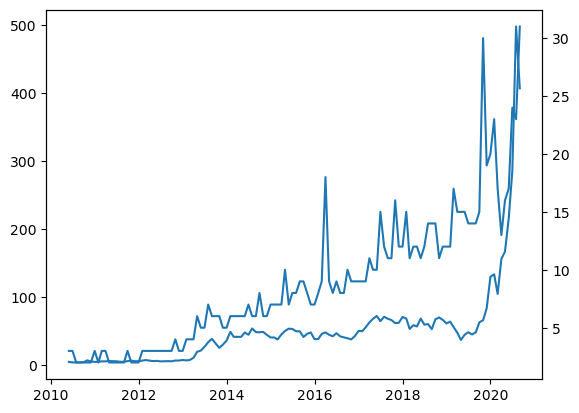

In [83]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE)
ax2.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH)